import libs

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn.cluster
import sklearn.decomposition

import sources code

In [30]:
import os.path
import sys

sys.path.append(os.path.abspath(os.path.join(os.path.dirname("src"), "../src")))

import features
import models
import data
import visualization

In [31]:
data_frame1 = pd.read_csv("../data/raw/CESATEM.tsv", delimiter='\t')
data_frame1 = data_frame1.dropna(axis=1, how='any')
columns1 = ["CESATEM_BR", "CESATEM_BS", "CESATEM_BT", "CESATEM_BV", "CESATEM_BW",
            "CESATEM_BX", "CESATEM_BY", "CESATEM_BZ", "CESATEM_CA", "CESATEM_CB",
            "CESATEM_CC", "CESATEM_CD"]
data_frame1.rename(columns=lambda x: x if x == "Date" else "CESATEM_" + x, inplace=True)
data_frame1 = data_frame1[columns1 + ["Date"]]
data_frame1.head()

,CESATEM_BR,CESATEM_BS,CESATEM_BT,CESATEM_BV,CESATEM_BW,CESATEM_BX,CESATEM_BY,CESATEM_BZ,CESATEM_CA,CESATEM_CB,CESATEM_CC,CESATEM_CD,Date
0,1107,1055,2948,4473,529,1018,754,579,683,2842,1486,1142,01/2000
1,1124,1088,3051,4366,523,1062,833,598,671,3197,1566,1134,02/2000
2,1026,971,2887,4426,442,967,865,573,672,2844,1452,1038,03/2000
3,1114,1061,3117,4467,490,1084,919,597,700,3146,1699,1293,04/2000
4,1207,1131,3188,4555,506,1145,973,636,806,3041,1485,1311,05/2000


In [32]:
new_data = pd.DataFrame()
for x in columns1:
    it = 0
    data = []
    while it < len(data_frame1[x]):
        v = None
        if it + 3 < len(data_frame1[x]):
            for xx in range(3):
                v = data_frame1[x][it + xx] if v is None else v + data_frame1[x][it + xx]
            data.append(v)
        it += 3
    new_data[x] = data
new_data.head()

,CESATEM_BR,CESATEM_BS,CESATEM_BT,CESATEM_BV,CESATEM_BW,CESATEM_BX,CESATEM_BY,CESATEM_BZ,CESATEM_CA,CESATEM_CB,CESATEM_CC,CESATEM_CD
0,3257,3114,8886,13265,1494,3047,2452,1750,2026,8883,4504,3314
1,3290,3124,9242,13396,1455,3355,2828,1781,2197,9084,4675,3839
2,3227,3067,9331,13359,1627,3546,2988,1888,2055,9343,4636,3790
3,3250,3094,9271,13342,1432,3311,2761,1804,2081,8923,4570,3573
4,3282,3085,9020,12866,1421,3201,2566,1764,2069,9238,4820,3277


In [33]:
data_frame2 = pd.read_csv("../data/raw/ESA.tsv", delimiter='\t')
data_frame2 = data_frame2.dropna(axis=0, how='any').reset_index(drop=True)
data_frame2.rename(columns=lambda x: x if x == "Date" else "ESA_" + x, inplace=True)
columns2 = data_frame2.columns.values
columns2 = np.delete(columns2, np.where(columns2 == "Date"))
data_frame2.head()

,Date,ESA_AA,ESA_AB,ESA_AC,ESA_AD,ESA_AE,ESA_AF,ESA_AG,ESA_AH,ESA_AI,...,ESA_BB,ESA_BC,ESA_BD,ESA_BE,ESA_BF,ESA_BG,ESA_BH,ESA_BI,ESA_BJ,ESA_BK
0,T1/2000,36.7,574.1,259.0,299.6,12.4,187.2,81.2,359.0,503.7,...,199.5,1413.5,248.2,239.2,368.5,647.1,241.2,488.6,376.4,589.0
1,T2/2000,36.6,578.2,256.4,300.7,12.8,186.2,82.1,361.8,507.1,...,202.9,1457.1,247.9,240.0,373.2,655.4,241.5,487.0,377.4,620.6
2,T3/2000,36.5,580.1,253.9,301.4,12.9,185.2,82.8,364.6,515.0,...,206.9,1483.1,247.9,240.5,377.2,662.8,238.7,487.5,378.5,632.9
3,T4/2000,36.3,582.0,251.4,302.6,13.0,185.0,83.7,368.0,519.8,...,210.0,1475.9,247.6,242.3,379.8,667.8,247.8,493.8,379.7,614.5
4,T1/2001,36.1,582.1,249.9,302.0,12.8,184.8,85.1,368.8,523.7,...,211.9,1511.3,247.3,242.8,382.8,672.4,246.8,494.1,381.1,636.0


In [34]:
data_frame = pd.concat([data_frame2, new_data], axis=1)
data_frame.head()

,Date,ESA_AA,ESA_AB,ESA_AC,ESA_AD,ESA_AE,ESA_AF,ESA_AG,ESA_AH,ESA_AI,...,CESATEM_BT,CESATEM_BV,CESATEM_BW,CESATEM_BX,CESATEM_BY,CESATEM_BZ,CESATEM_CA,CESATEM_CB,CESATEM_CC,CESATEM_CD
0,T1/2000,36.7,574.1,259.0,299.6,12.4,187.2,81.2,359.0,503.7,...,8886,13265,1494,3047,2452,1750,2026,8883,4504,3314
1,T2/2000,36.6,578.2,256.4,300.7,12.8,186.2,82.1,361.8,507.1,...,9242,13396,1455,3355,2828,1781,2197,9084,4675,3839
2,T3/2000,36.5,580.1,253.9,301.4,12.9,185.2,82.8,364.6,515.0,...,9331,13359,1627,3546,2988,1888,2055,9343,4636,3790
3,T4/2000,36.3,582.0,251.4,302.6,13.0,185.0,83.7,368.0,519.8,...,9271,13342,1432,3311,2761,1804,2081,8923,4570,3573
4,T1/2001,36.1,582.1,249.9,302.0,12.8,184.8,85.1,368.8,523.7,...,9020,12866,1421,3201,2566,1764,2069,9238,4820,3277


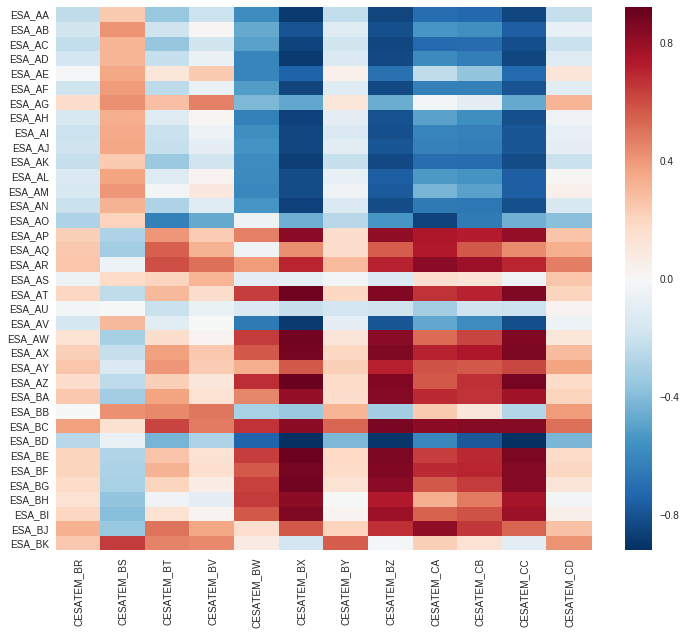

In [35]:
corr = data_frame.corr()
corr = corr[columns1].filter(items=columns2, axis=0)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, xticklabels=columns1, yticklabels=columns2)
plt.show()

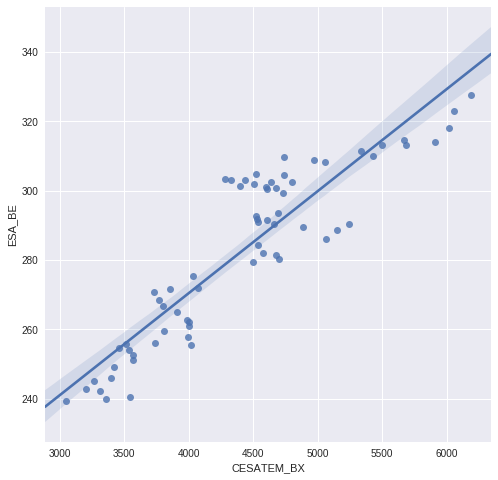

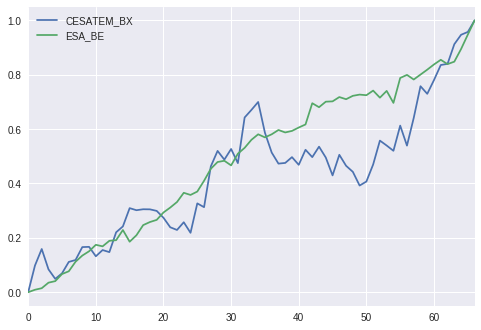

In [36]:
plt.figure(figsize=(8, 8))
ax = sns.regplot(x="CESATEM_BX", y="ESA_BE", data=data_frame)
plt.show()
plt.figure(figsize=(40, 40))
tmp = data_frame[["CESATEM_BX", "ESA_BE"]]
tmp = (tmp - tmp.min()) / (tmp.max() - tmp.min())
tmp.plot.line()
plt.show()

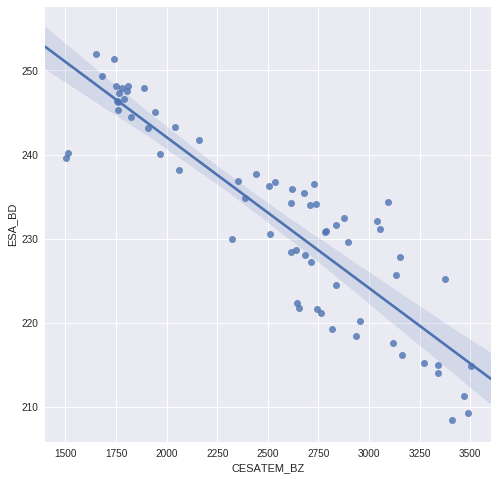

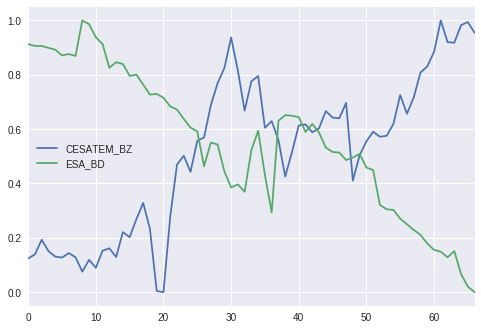

In [37]:
plt.figure(figsize=(8, 8))
ax = sns.regplot(x="CESATEM_BZ", y="ESA_BD", data=data_frame)
plt.show()
plt.figure(figsize=(40, 40))
tmp = data_frame[["CESATEM_BZ", "ESA_BD"]]
tmp = (tmp - tmp.min()) / (tmp.max() - tmp.min())
tmp.plot.line()
plt.show()

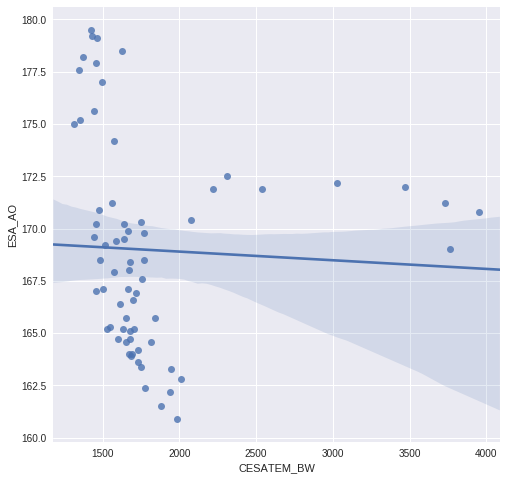

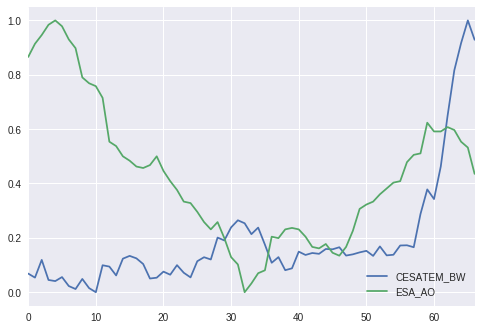

In [38]:
plt.figure(figsize=(8, 8))
ax = sns.regplot(x="CESATEM_BW", y="ESA_AO", data=data_frame)
plt.show()
plt.figure(figsize=(40, 40))
tmp = data_frame[["CESATEM_BW", "ESA_AO"]]
tmp = (tmp - tmp.min()) / (tmp.max() - tmp.min())
tmp.plot.line()
plt.show()

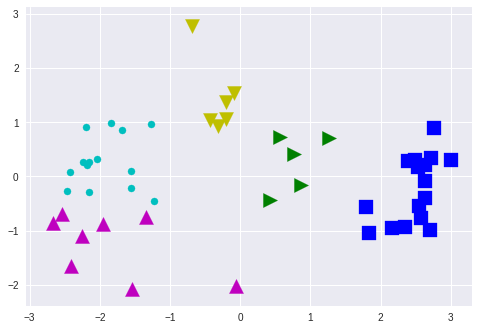

In [39]:
s_data = data_frame.copy().drop("Date", axis=1)
s_data = (s_data - s_data.min()) / (s_data.max() - s_data.min())
s_data = s_data.transpose()
reduced_data = sklearn.decomposition.PCA(n_components=2).fit_transform(s_data)
kmeans = sklearn.cluster.KMeans(n_clusters=5, random_state=0).fit(reduced_data)
plot = [".", ",", ">", "v", "^", "<", "s", "8"]
color = ["c", "b", "g", "y", "m", "k"]
for i in range(0, reduced_data.shape[0]):
    plt.scatter(reduced_data[i,0], reduced_data[i,1], c=color[kmeans.labels_[i]],
                marker=plot[kmeans.labels_[i]], s=200)
plt.show()